In [20]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Questions
1 - What are top 15 best companies?<br>
2 - How review vary based on if the reviewer is a current, former employee or a contractor?<br>
3 - What is the recommendation rate?

## Look at the data

In [21]:
def print_divider(message):
    print(f"=================== {message} ==============================")

In [22]:
df = pd.read_csv('glassdoor_reviews.csv')
print_divider("DF Shape")
df.tail(10)

=================== DF Shape ==============================


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
838556,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,5.0,4.0,2.0,5.0,v,v,v,Working at LEGO was pretty cool,It's fun to walk around the LEGO store,Doesn't pay a living wage
838557,the-LEGO-Group,2021-05-24,Service Employee,Current Employee,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,.,"Ok work, discount on Lego sets","Management is bad, and more"
838558,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,2.0,3.0,2.0,3.0,v,r,v,A great brand,Family owned and a great brand. Danish culture...,"A lot of bureaucracy, hard to make things happ..."
838559,the-LEGO-Group,2021-05-29,Store Clerk,"Former Employee, more than 3 years","New York, NY",2,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Friendly staff members at LEGO,"The staff is friendly, you get to be around ch...",Sometimes the children can behave badly. You m...
838560,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,5.0,v,v,v,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important...."
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
838562,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...
838563,the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,5.0,5.0,5.0,3.0,5.0,3.0,v,o,o,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
838564,the-LEGO-Group,2021-06-04,Customer Service Representative,"Current Employee, less than 1 year",NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."
838565,the-LEGO-Group,2021-06-04,Human Resources Specialist,"Current Employee, more than 3 years","Kladno, Central Bohemian, Central Bohemian",5,4.0,5.0,4.0,4.0,5.0,5.0,v,v,o,I strongly recommend the LEGO Group as employer,The LEGO Group is company with many opportunit...,Many things are centralized in Denmark and rel...


In [23]:
df[['recommend', 'overall_rating']].values

array([['x', 2],
       ['x', 2],
       ['x', 1],
       ...,
       ['v', 4],
       ['o', 5],
       ['v', 5]], dtype=object)

In [24]:
print_divider("DF Summary")
df.describe()

=================== DF Summary ==============================


,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000
mean,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576
std,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [25]:
# List of columns with missing  data percentage  
df.isnull().mean().sort_values(ascending=False)

diversity_inclusion    0.837740
location               0.354579
culture_values         0.228215
senior_mgmt            0.185884
comp_benefits          0.178975
work_life_balance      0.178750
career_opp             0.175897
headline               0.002646
cons                   0.000010
date_review            0.000000
overall_rating         0.000000
current                0.000000
recommend              0.000000
ceo_approv             0.000000
outlook                0.000000
job_title              0.000000
pros                   0.000000
firm                   0.000000
dtype: float64

<AxesSubplot: >

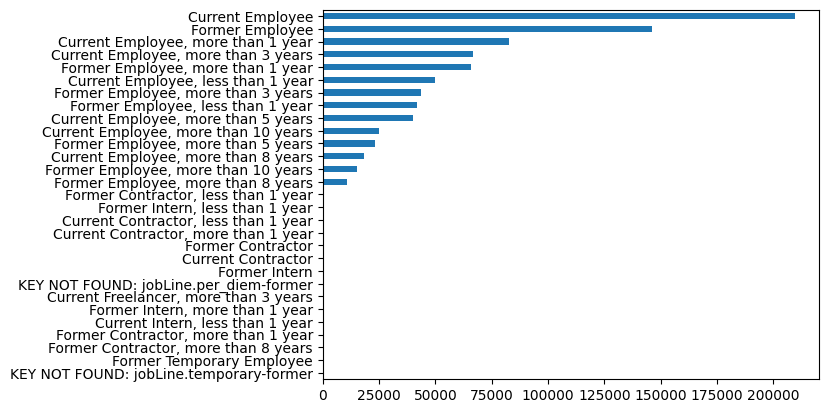

In [26]:
# List of the different type of person

type_of_person = df['current'].value_counts()
type_of_person.sort_values().plot(kind='barh', )

In [27]:
# List of firms and job titles
firms_and_positions = df[['firm']].value_counts()
firms_and_positions

firm                    
IBM                         60436
McDonald-s                  49450
Deloitte                    46995
EY                          34050
PwC                         33227
                            ...  
i-Net-Solution                  4
Health-Protection-Agency        4
The-Survey-Association          3
NPSA                            2
UKCIL                           1
Length: 428, dtype: int64

### Q1 - What are top 5 best companies?<br>
To list the top best companies, we will lookup the firm and overall_rating columns

In [28]:
top_companies_df = df[['firm', 'overall_rating']]
top_companies_df.head(5)

,firm,overall_rating
0,AFH-Wealth-Management,2
1,AFH-Wealth-Management,2
2,AFH-Wealth-Management,1
3,AFH-Wealth-Management,5
4,AFH-Wealth-Management,1


In [29]:
top_companies_df.dtypes

firm              object
overall_rating     int64
dtype: object

In [30]:
# Drop rows where there is no firm
top_companies_df = top_companies_df.dropna(subset='firm', axis=0)

# fill rows where the overall_rating is missing with 0
top_companies_df['overall_rating'] = top_companies_df['overall_rating'].fillna(0)

# Convert firm values to string
top_companies_df["firm"] = top_companies_df["firm"].astype('string', errors='raise')

top_companies_df.dtypes

firm              string
overall_rating     int64
dtype: object

In [31]:
# Let create necessary variable for a bayesian average calculation
# Details for bayesian average here => shorturl.at/kGPZ5
m = top_companies_df['overall_rating'].sum() / top_companies_df['overall_rating'].count()
# Calcuate the confidence number of ranking
c = top_companies_df['firm'].value_counts().quantile(q=.25)
ratings_avgs = top_companies_df.groupby('firm')['overall_rating'].mean()
ratings_counts = top_companies_df.groupby('firm')['overall_rating'].count()


<AxesSubplot: title={'center': 'TOP 15 BEST COMPANIES'}, xlabel='Overall rating', ylabel='Companies'>

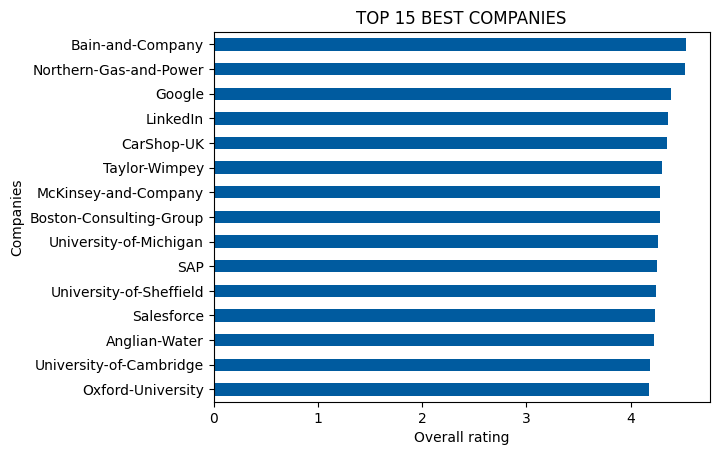

In [32]:
bayes_average_df = ((ratings_counts * ratings_avgs) + (c * m)) / (ratings_counts + c)
bayes_average_df.nlargest(15).sort_values().plot(title="TOP 15 BEST COMPANIES", color='#005b9f', kind='barh', xlabel="Overall rating", ylabel="Companies")

## Q2: How review vary based on if the reviewer is a current, former employee or a contractor?

Looking at the current column, we can see there is different type of person(employee)
giving review, let see how the review vary base on them.

In [33]:
person_type_df = df[['current', 'overall_rating']]
person_type_df['current'] = person_type_df['current'].str.split(',')\
    .apply(lambda x: x[0])


/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_5164/2828433069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_type_df['current'] = person_type_df['current'].str.split(',')\


In [34]:
person_type_df['current'] = person_type_df['current'].astype('string')

/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_5164/3552306037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_type_df['current'] = person_type_df['current'].astype('string')


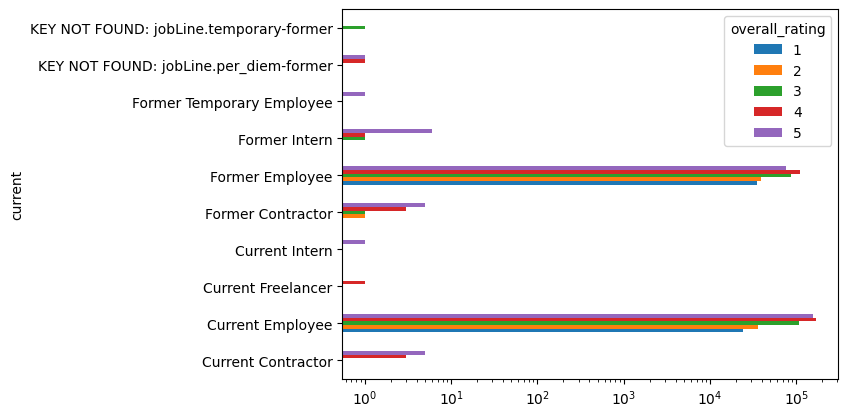

In [35]:
result_df = person_type_df.groupby(['current', 'overall_rating']).value_counts().unstack(level=1)
result_df.plot.barh().set_xscale('log')

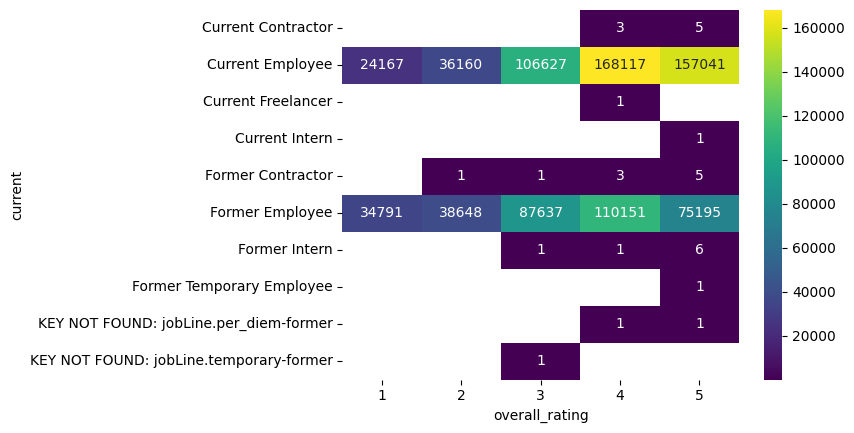

In [36]:
sns.heatmap(result_df, annot=True, fmt="g", cmap='viridis')
plt.show()

From the above chart, one can conclude that current employees are the first one to give a review to their companies, then former employee follow. Contractors don't use to give a review but when they do they give a good overall review. Former employees are the first group of reviewers which give a bad overall rating.

Q3 - What is the recomendation rate?


In [37]:
recom_rate_df = df['recommend']

/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_5164/1747611831.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  result.set_yticklabels([f'{x/df.shape[0]:.0%}' for x in result.get_yticks()])


<AxesSubplot: >

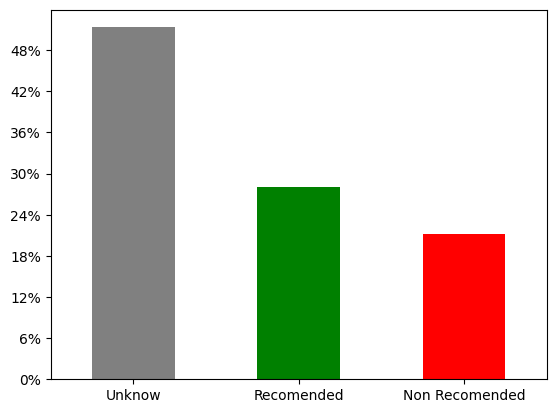

In [38]:
recom_rate_df = recom_rate_df.astype('category')
result = recom_rate_df.value_counts().plot(kind='bar', color=['grey', 'green', 'red'], rot=0)
result.set_xticklabels(['Unknow', 'Recomended', 'Non Recomended'])
result.set_yticklabels([f'{x/df.shape[0]:.0%}' for x in result.get_yticks()])
result

## References
glassdoor_reviews dataset: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews <br>
Medium: https://medium.com/@emmanoedorh/udacity-data-scientist-nanodegree-63f3ca2b7189 <br>